# **Import Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.xlsx to churn_prediction.xlsx


# **Data Processing**

In [3]:
import io
data = pd.read_excel('churn_prediction.xlsx')
# Hiển thị các hàng đầu tiên của DataFrame
print(data.head())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [4]:
df = data

In [5]:
df.shape

(5630, 20)

In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
def count_NaN_values(df):
    """
    Hàm để đếm số lượng giá trị NaN trong DataFrame.

    Tham số:
    df (pandas.DataFrame): DataFrame để đếm giá trị NaN.
    """
    # Đếm số lượng giá trị NaN trong DataFrame
    nan_dict = {}

    for col in df.columns:
        num_NaN = df[col].isna().sum()
        nan_dict[col] = num_NaN

    NaN_table = pd.DataFrame.from_dict(nan_dict, orient='index', columns=['Number of NaN']).reset_index()
    NaN_table.rename(columns={'index': 'Column'}, inplace=True)
    print(NaN_table)

In [8]:
def NaN_column(df):
    """
    Hàm trả ra list cột có NaN values.

    Tham số:
    df (pandas.DataFrame): DataFrame để kiểm tra giá trị NaN.
    """
    list_nan_col = []
    for col in df.columns:
        if df[col].isna().sum() > 0:
            list_nan_col.append(col)
    return list_nan_col

In [9]:
def identify_column_types(df):
    """
    Hàm để xác định các cột dạng số và dạng category trong DataFrame.

    Tham số:
    df (pandas.DataFrame): DataFrame để xác định loại cột.

    Trả về:
    tuple: Gồm hai danh sách, danh sách các cột số và danh sách các cột category.
    """
    # Danh sách các cột dạng số
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Danh sách các cột dạng category
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # In ra các cột dạng số và category
    print("Các cột dạng numerical:", numerical_cols)
    print("Các cột dạng category:", categorical_cols)

    return numerical_cols, categorical_cols

In [10]:
from google.colab import output
output.enable_custom_widget_manager()

In [11]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [12]:
from google.colab import output
output.disable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [13]:
from google.colab import output
output.disable_custom_widget_manager()

In [14]:
numerical_cols, categorical_cols = identify_column_types(df)


Các cột dạng numerical: ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Các cột dạng category: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


## **Check imbalanced data**

In [15]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.831616
1,0.168384


Data hơi imbalanced, cân nhắc dùng **SMOTE** nếu kết quả không như mong muốn

## **Handle values**

In [16]:
count_NaN_values(df)

                         Column  Number of NaN
0                    CustomerID              0
1                         Churn              0
2                        Tenure            264
3          PreferredLoginDevice              0
4                      CityTier              0
5               WarehouseToHome            251
6          PreferredPaymentMode              0
7                        Gender              0
8                HourSpendOnApp            255
9      NumberOfDeviceRegistered              0
10             PreferedOrderCat              0
11            SatisfactionScore              0
12                MaritalStatus              0
13              NumberOfAddress              0
14                     Complain              0
15  OrderAmountHikeFromlastYear            265
16                   CouponUsed            256
17                   OrderCount            258
18            DaySinceLastOrder            307
19               CashbackAmount              0


--> Data có một số cột có hàng trống

In [17]:
# Xử lý đối với cột Tenure
import seaborn as sns
import matplotlib.pyplot as plt

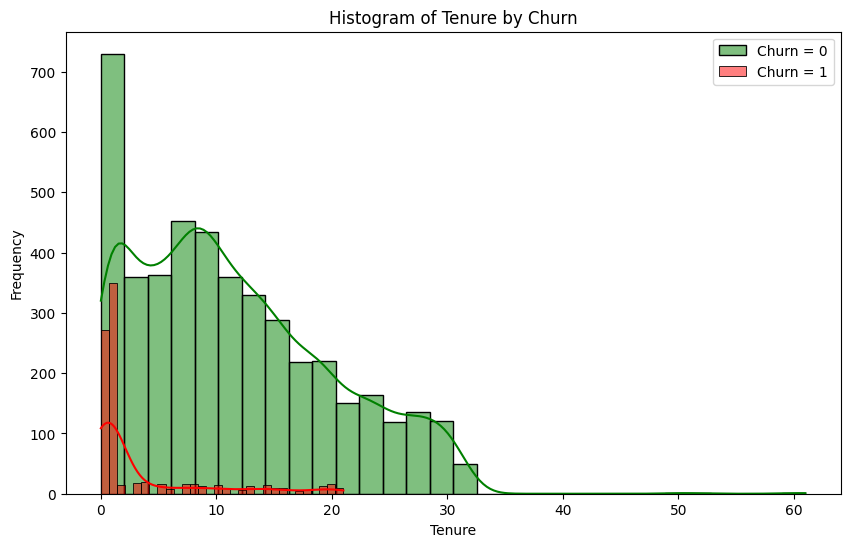

In [18]:
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'Tenure'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True, bins=30)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True, bins=30)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [19]:
# Thay thế các giá trị trống bằng giá trị 0
df['Tenure'] = df['Tenure'].fillna(0)

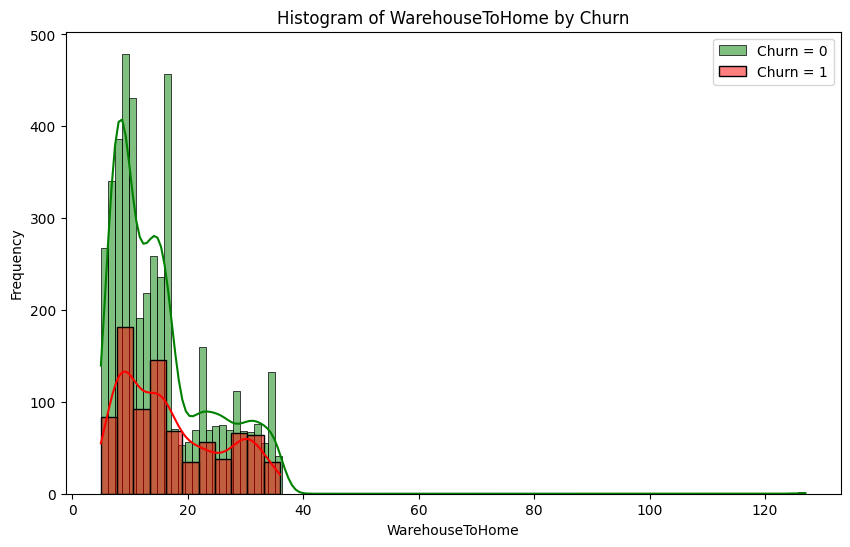

In [20]:
# Xử lý đối với cột WarehousetoHome
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'WarehouseToHome'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [21]:
# Thay thế các giá trị trống bằng giá trị mean
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())

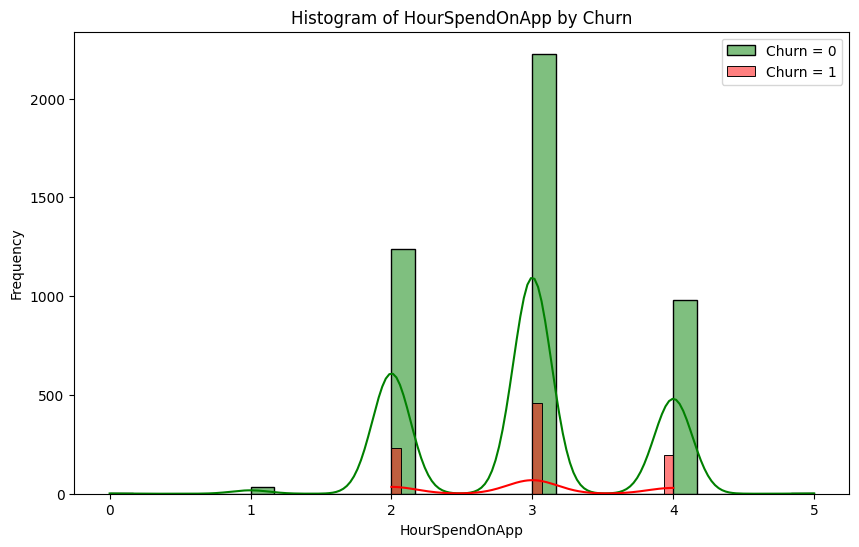

In [22]:
# Xử lý đối với cột WarehousetoHome
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'HourSpendOnApp'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True, bins=30)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True, bins=30)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [23]:
# Thay thế các giá trị trống bằng giá trị mean
# Tuy nhiên khi kiểm tra các giá trị chỉ nhận là số nguyên, nên số mean là 2,93 được làm tròn thành 3
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(3)

In [24]:
list_nan_col = NaN_column(df)
df[list_nan_col].head()

,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,11.0,1.0,1.0,5.0
1,15.0,0.0,1.0,0.0
2,14.0,0.0,1.0,3.0
3,23.0,0.0,1.0,3.0
4,11.0,1.0,1.0,3.0


In [25]:
list_nan_col

['OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

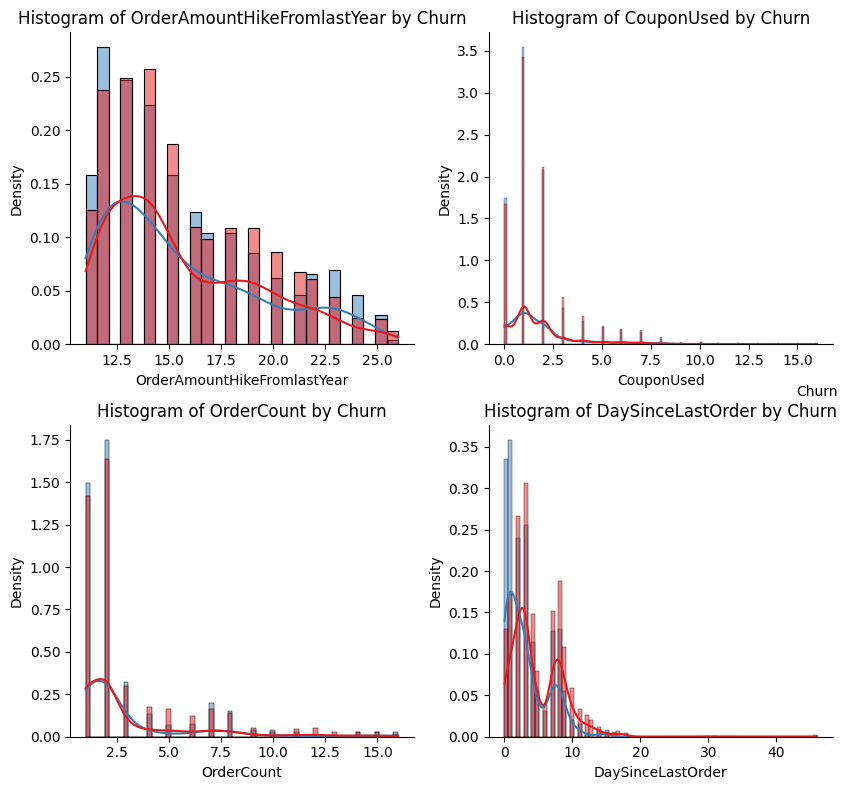

In [26]:
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]
list_nan_col = ['OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']


# Tạo lưới biểu đồ
g = sns.FacetGrid(pd.melt(df, id_vars='Churn', value_vars=list_nan_col), col="variable", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='value', hue='Churn', kde=True, stat='density', common_norm=False, palette='Set1')

# Thêm tiêu đề và nhãn cho mỗi biểu đồ
for ax, column in zip(g.axes.flat, list_nan_col):
    ax.set_title(f'Histogram of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Thêm legend cho mỗi biểu đồ
g.add_legend(title='Churn')

plt.tight_layout()
plt.show()

In [27]:
# Thay thế các giá trị của 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount','DaySinceLastOrder'
# bằng giá trị mean
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
# bằng giá trị 0
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(0)

In [28]:
# Loại bỏ dòng lặp
df_unique = df.drop_duplicates()
df_unique.count()
df = df_unique

## **Feature Engineering & EDA**

In [29]:
# !pip install pandas-profiling

In [30]:
# !pip install pandas-profiling[notebook]
# !pip install -U pandas-profiling

In [31]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [32]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
# profile.to_file(output_file="name of html file.html")

In [33]:
# from google.colab import files

# Download the report
# files.download('name of html file.html')

In [34]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


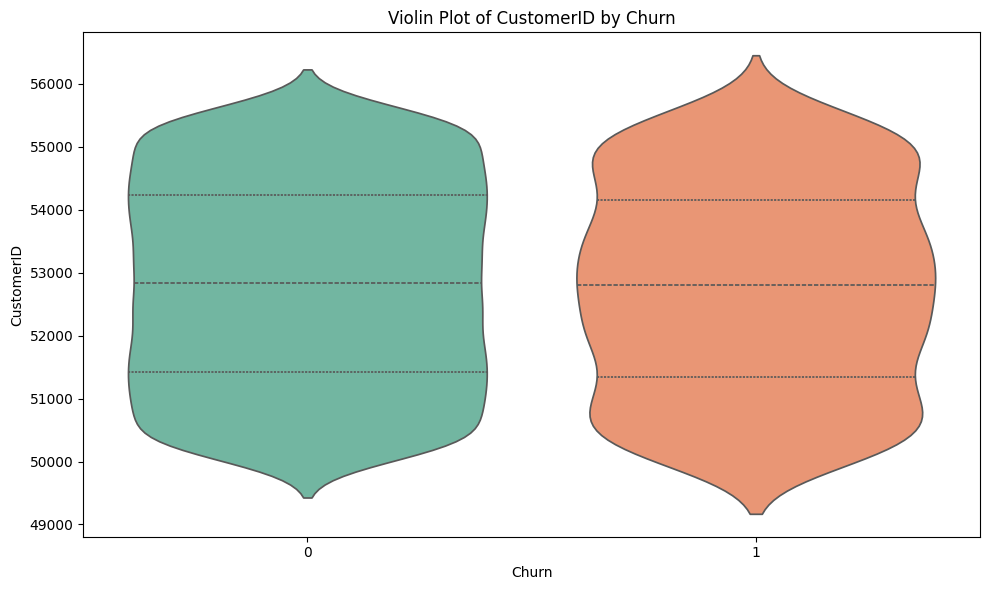

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


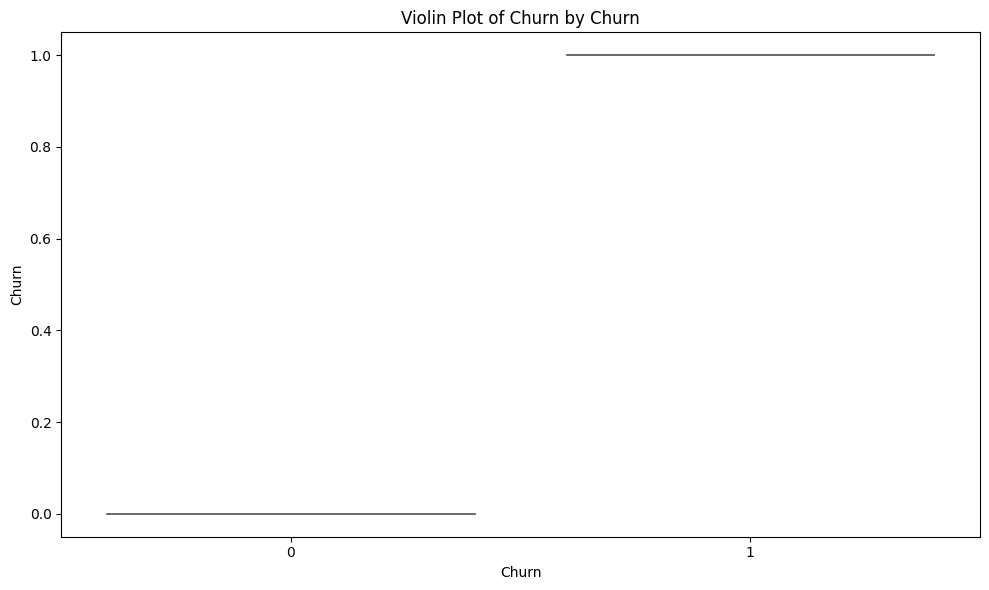

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


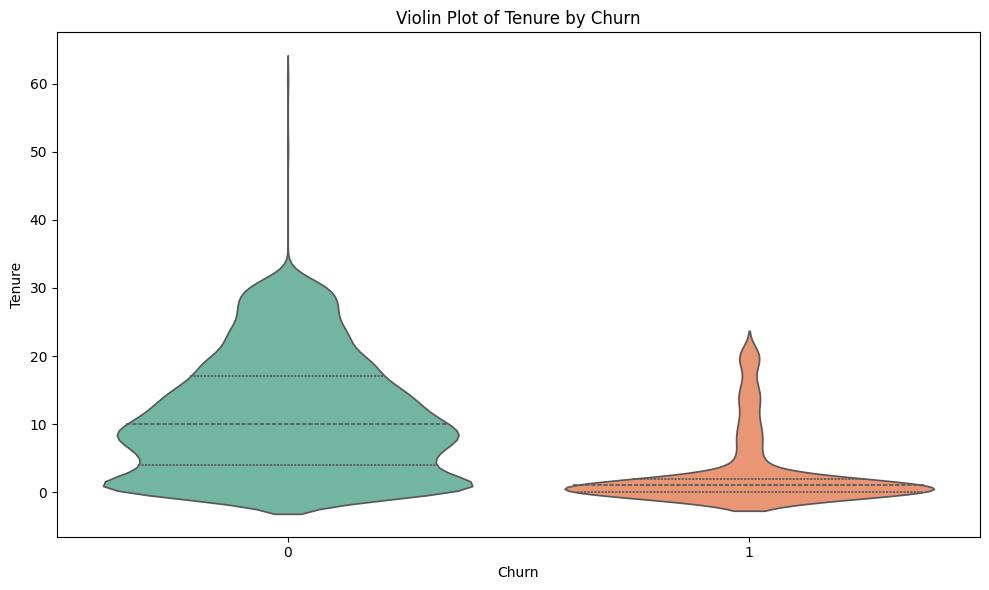

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


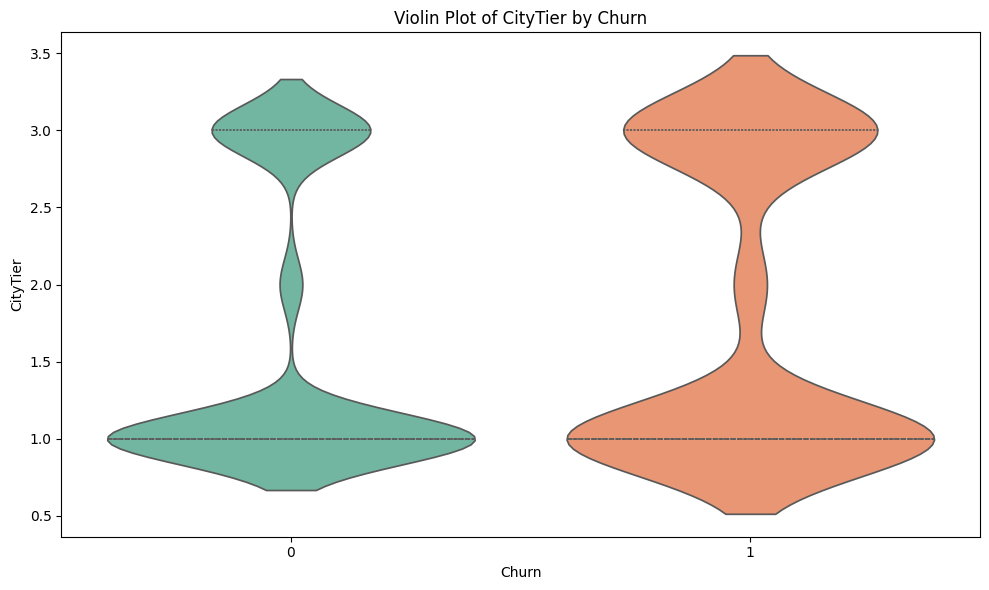

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


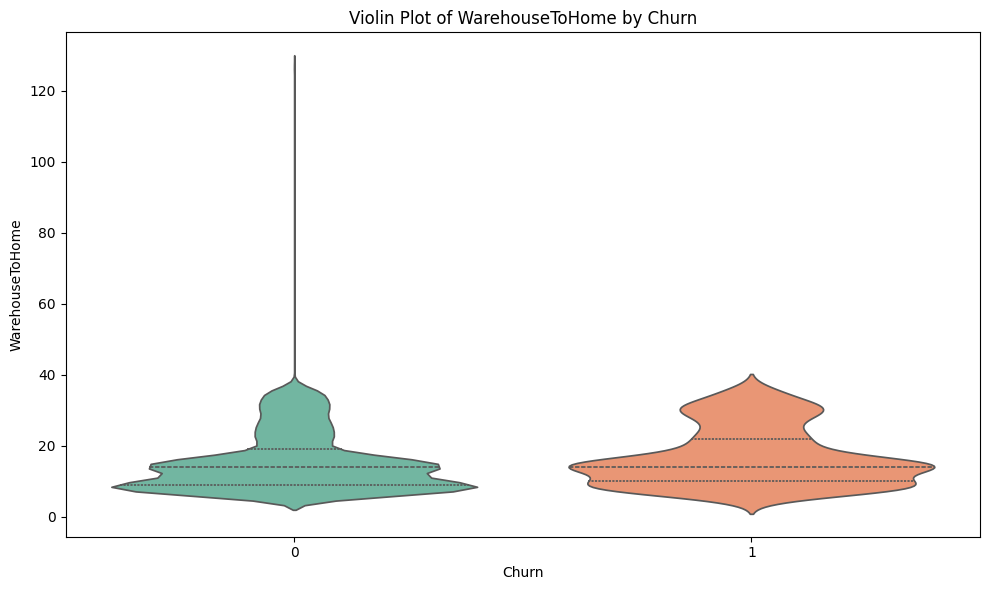

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


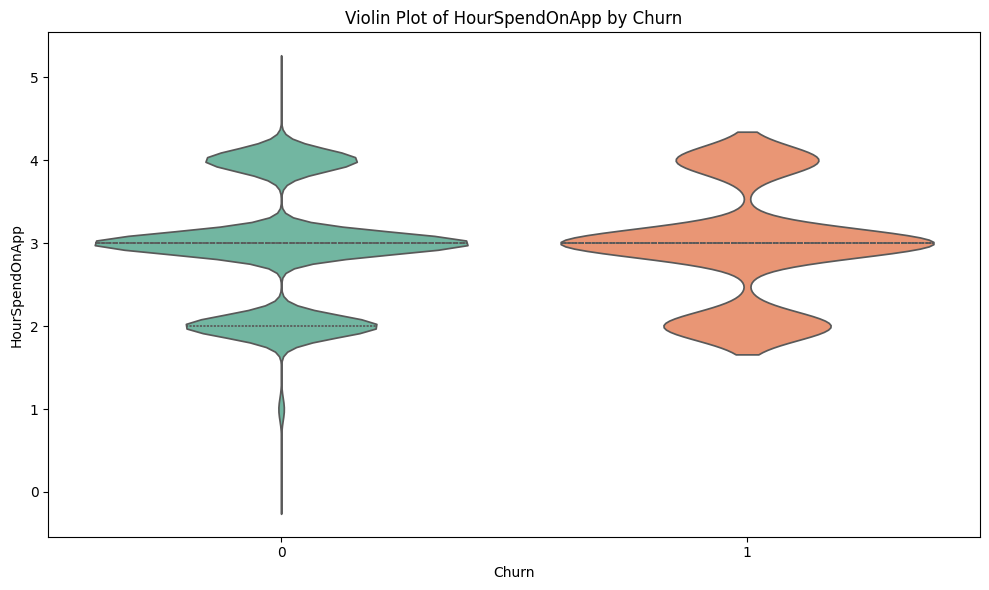

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


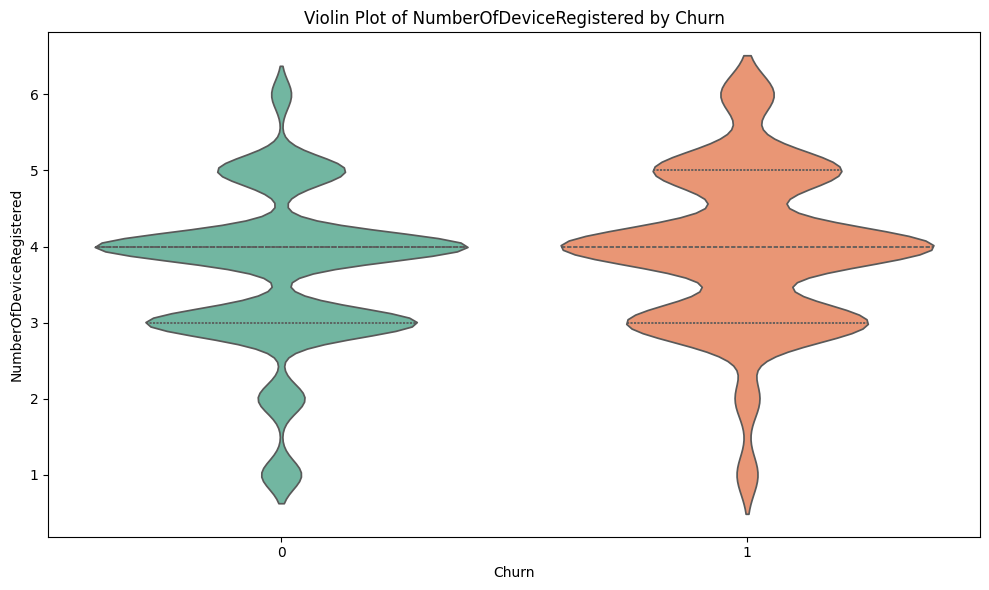

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


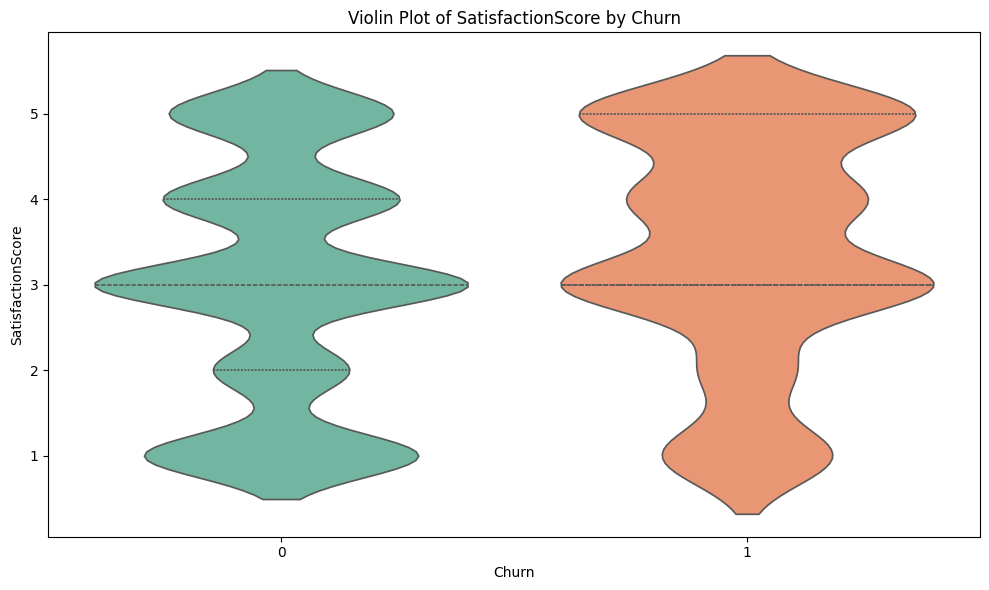

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


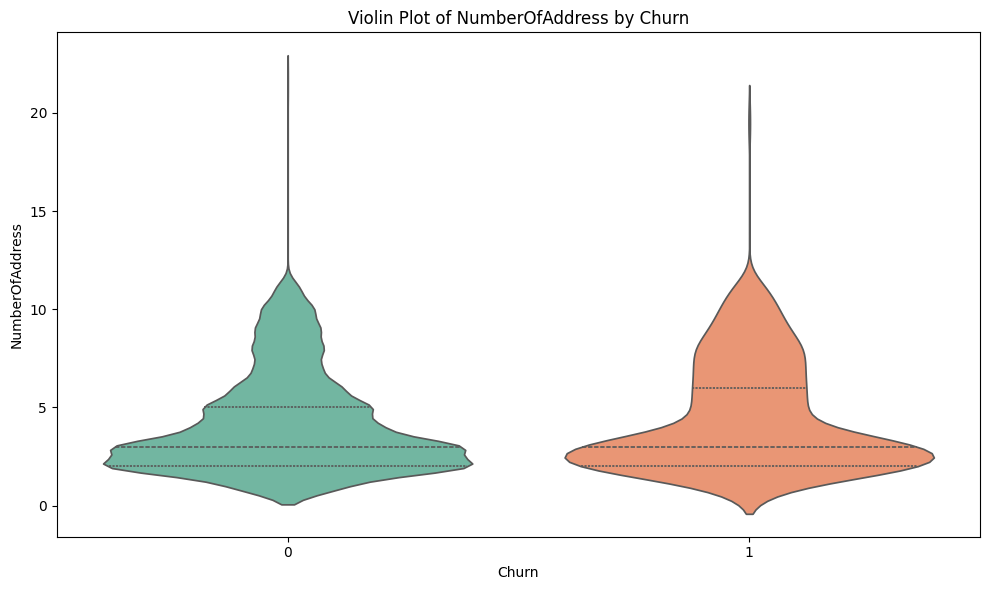

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


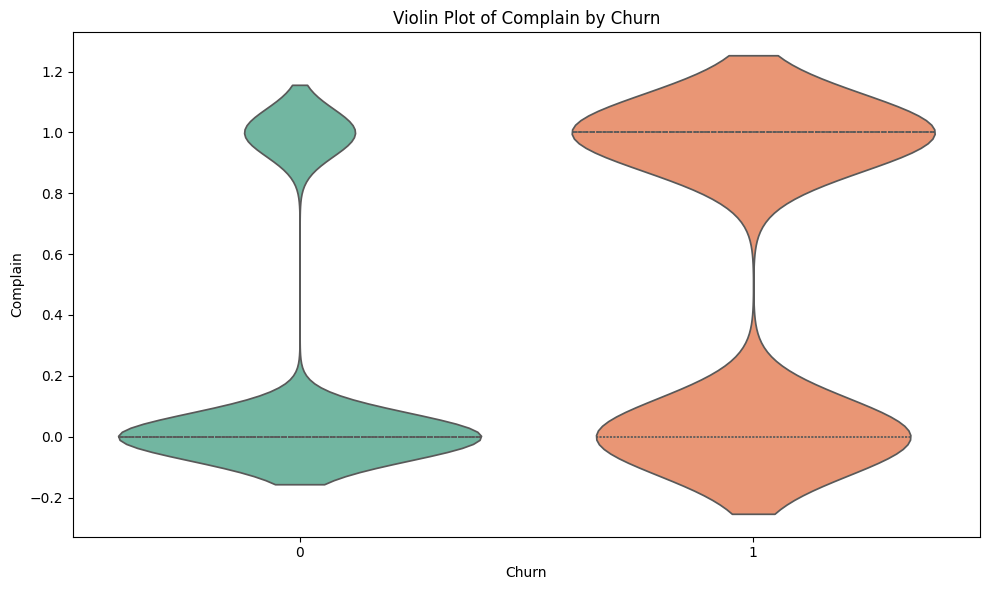

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


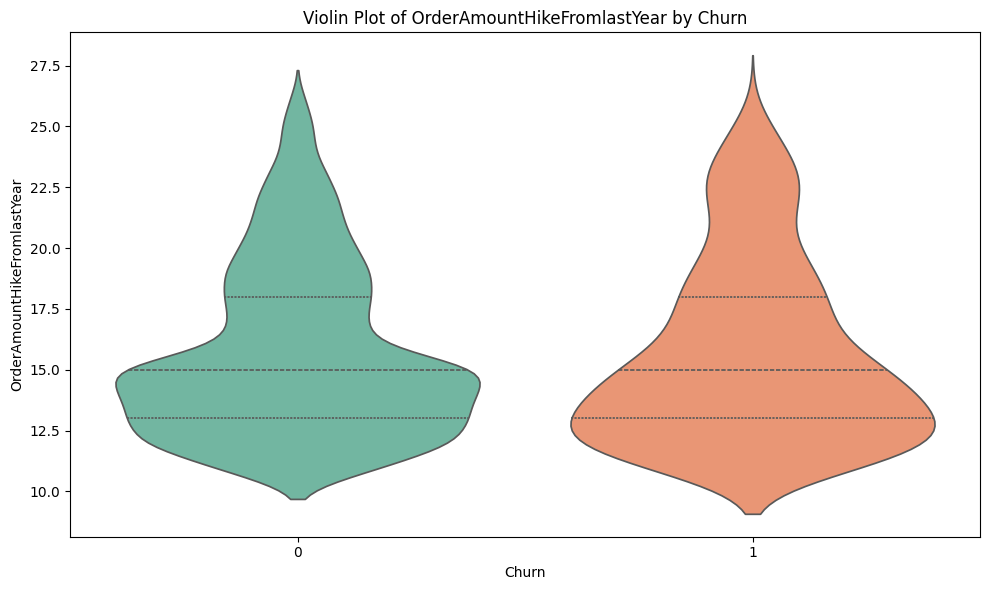

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


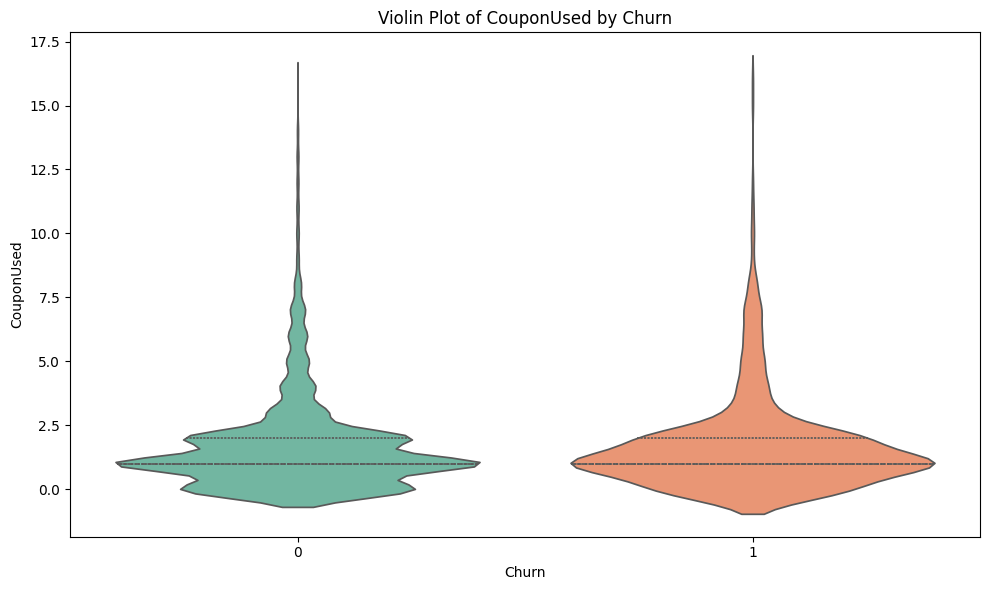

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


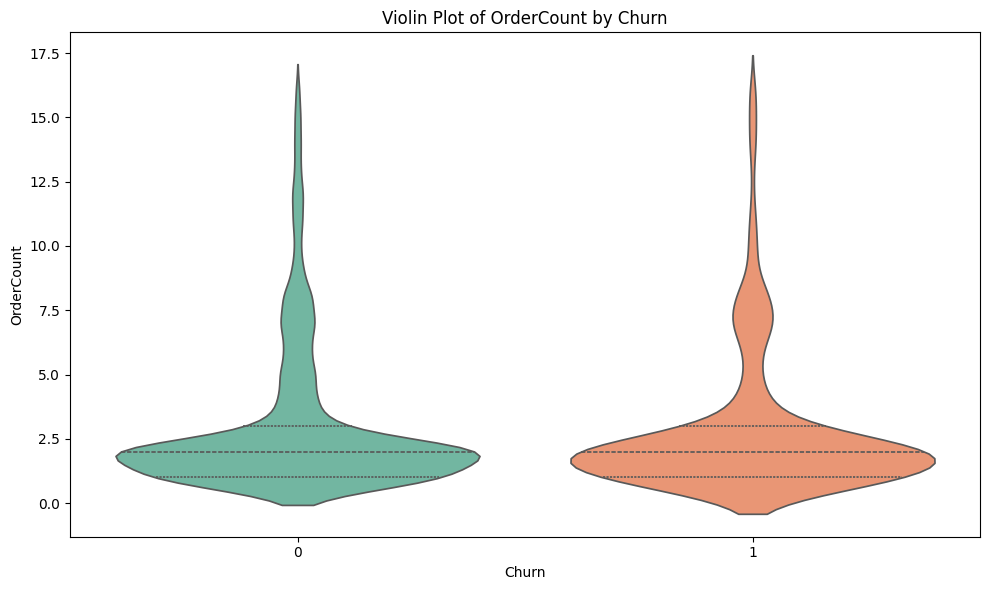

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


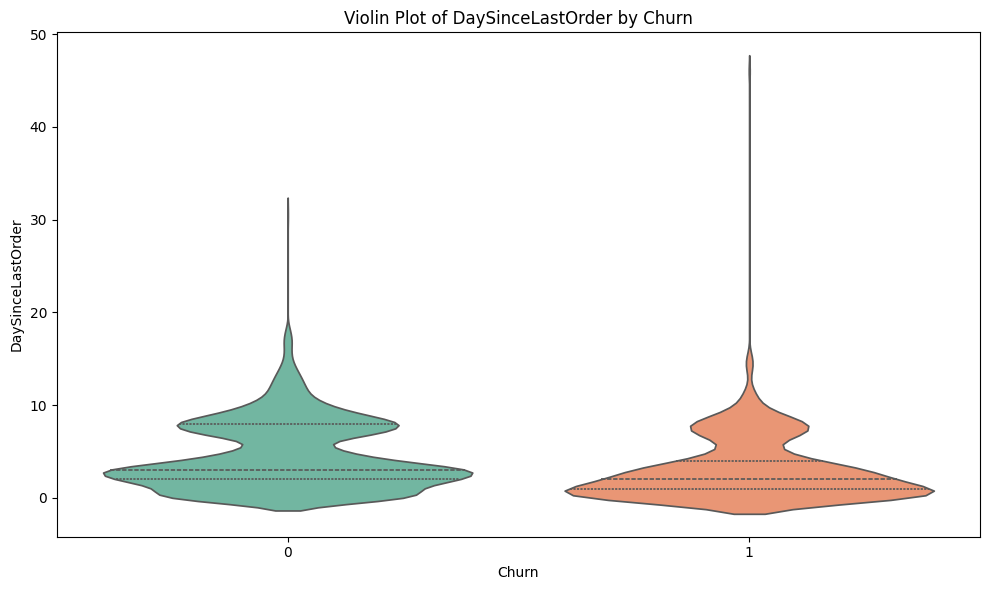

<ipython-input-35-f3e939b07ddb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")


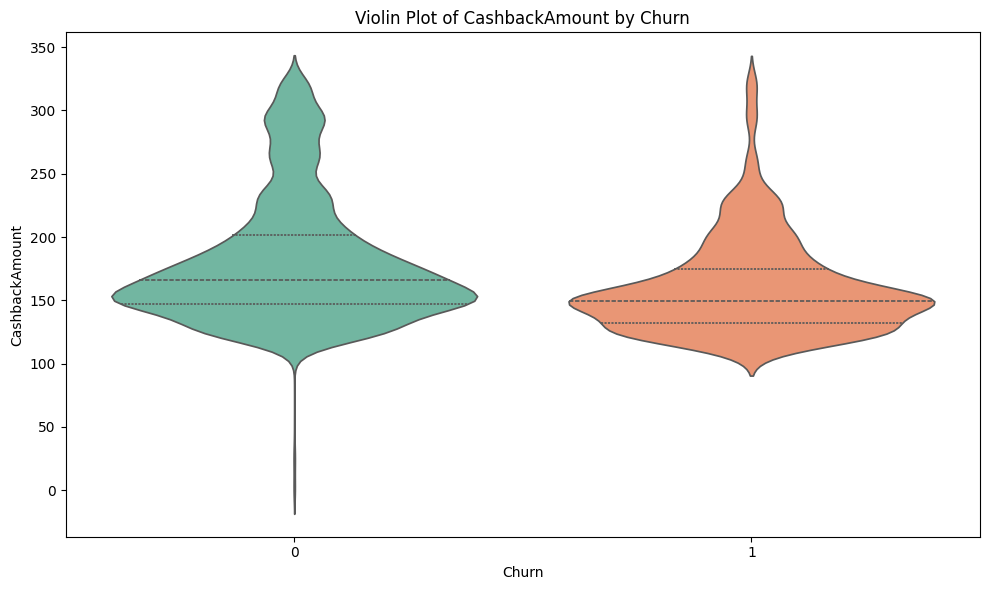

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df đã được định nghĩa và chứa các cột số trong numerical_cols
# df = pd.read_csv('your_dataframe.csv')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    # Vẽ violin plot cho mỗi cột số theo biến Churn
    sns.violinplot(data=df, x='Churn', y=col, palette='Set2', inner="quartile")

    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.title(f'Violin Plot of {col} by Churn')
    plt.tight_layout()
    plt.show()


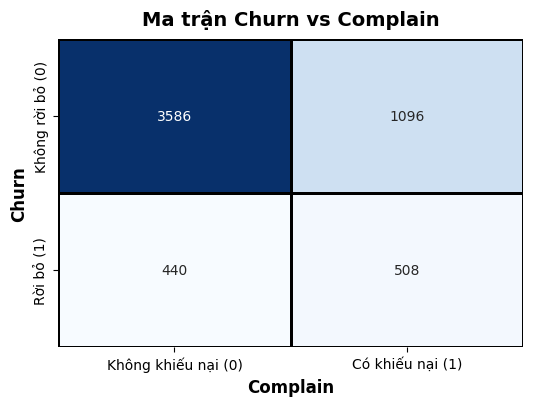

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df đã được định nghĩa và chứa cột 'Churn' và 'Complain'
# df = pd.read_csv('your_dataframe.csv')

# Tạo bảng tần số (contingency table)
churn_complain_matrix = pd.crosstab(df['Churn'], df['Complain'])

# Đổi tên hàng và cột để dễ hiểu hơn
churn_complain_matrix.index = ['Không rời bỏ (0)', 'Rời bỏ (1)']
churn_complain_matrix.columns = ['Không khiếu nại (0)', 'Có khiếu nại (1)']

# Vẽ heatmap với seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(churn_complain_matrix, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor='black', cbar=False)

# Tiêu đề và nhãn trục
plt.title("Ma trận Churn vs Complain", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Complain", fontsize=12, fontweight='bold')
plt.ylabel("Churn", fontsize=12, fontweight='bold')

# Hiển thị
plt.show()




<ipython-input-37-63ccf17e7f7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='CashbackAmount', palette='Set2')


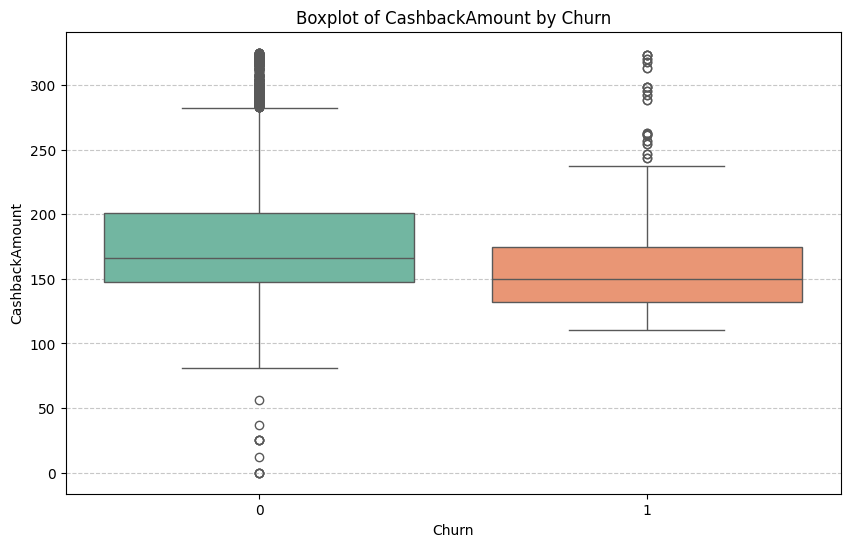

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='CashbackAmount', palette='Set2')

plt.xlabel('Churn')
plt.ylabel('CashbackAmount')
plt.title('Boxplot of CashbackAmount by Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-38-f75a49d3ca20>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette="Set2")


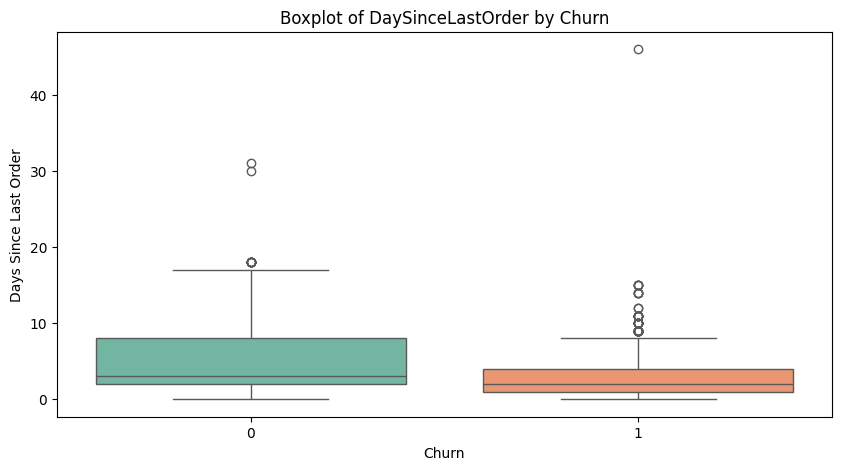

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả định df đã có sẵn với các cột 'Churn' và 'DaySinceLastOrder'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette="Set2")
plt.title("Boxplot of DaySinceLastOrder by Churn")
plt.xlabel("Churn")
plt.ylabel("Days Since Last Order")
plt.show()

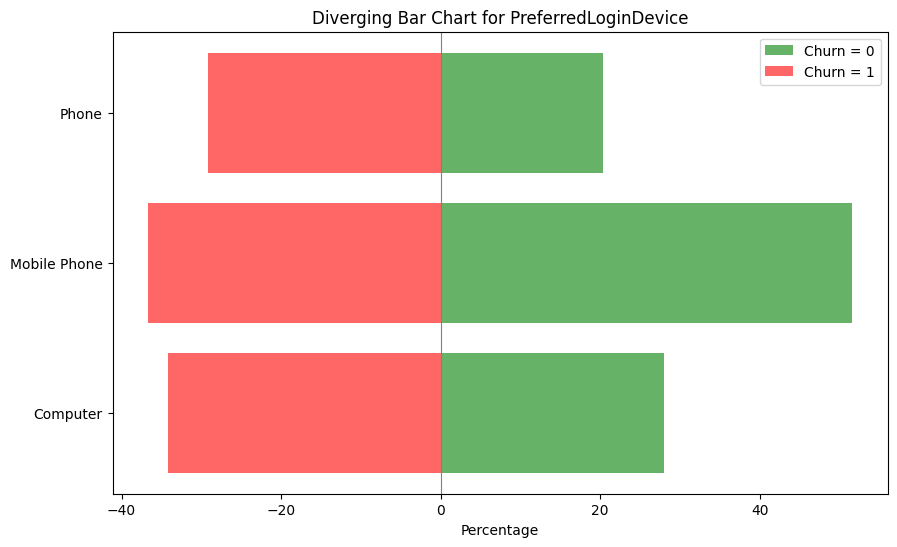

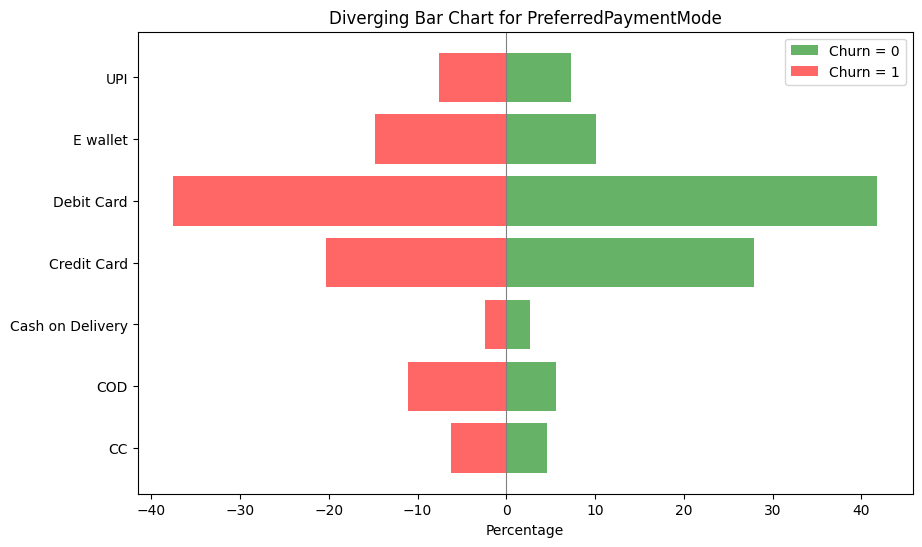

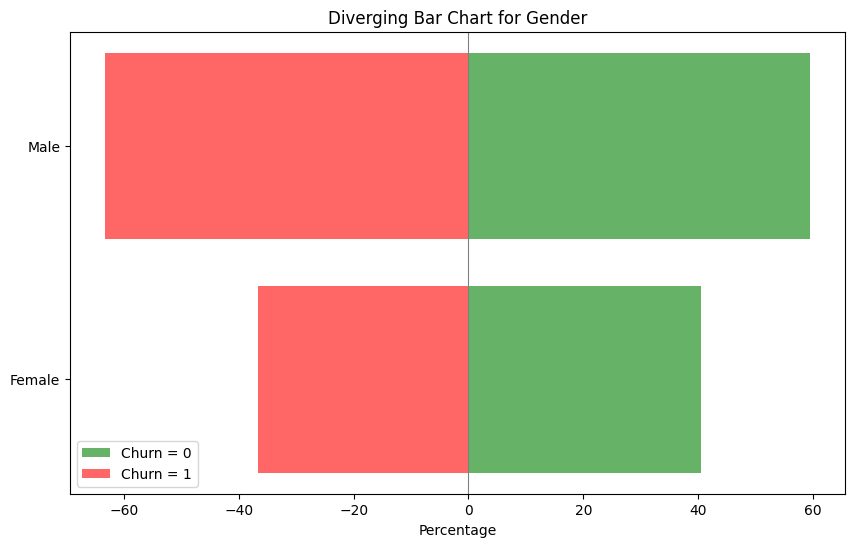

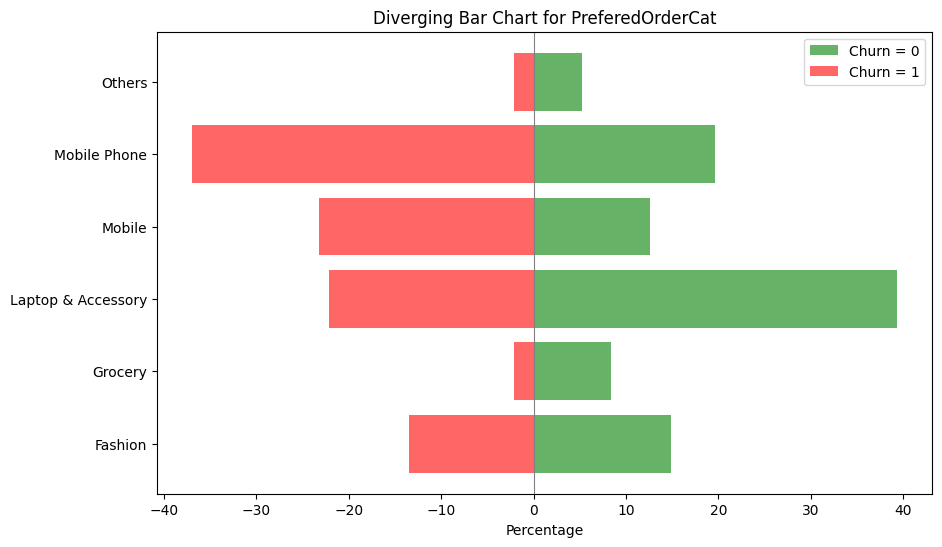

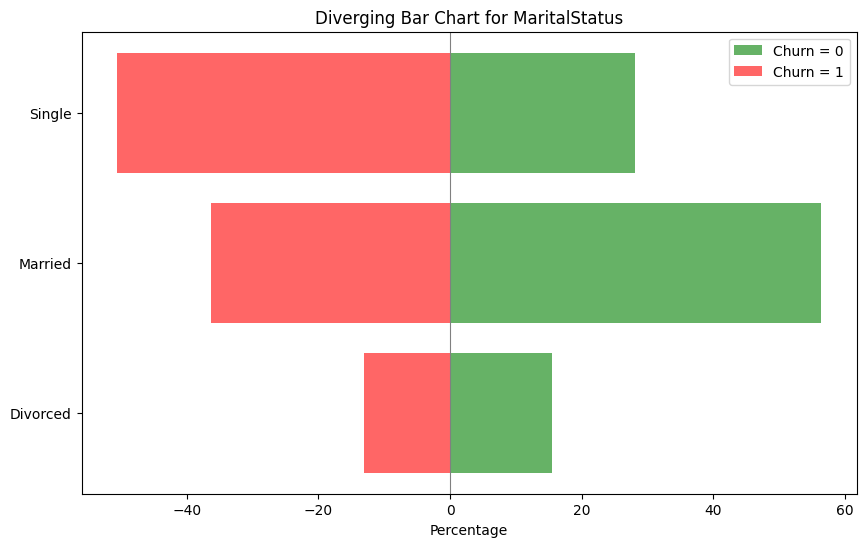

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot diverging bar chart
def plot_diverging_bar_chart(df, categorical_cols, target):
    for col in categorical_cols:
        # Create a cross-tabulation of counts normalized by columns to get percentages
        cross_tab = pd.crosstab(df[col], df[target], normalize='columns') * 100

        # Ensure both churn values (0 and 1) are present in the columns
        if 0 not in cross_tab.columns:
            cross_tab[0] = 0
        if 1 not in cross_tab.columns:
            cross_tab[1] = 0

        cross_tab = cross_tab[[0, 1]]  # Ensure the order of columns is [0, 1]

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot bars for churn = 0
        bars0 = ax.barh(cross_tab.index, cross_tab[0], color='green', alpha=0.6, label='Churn = 0')

        # Plot bars for churn = 1
        bars1 = ax.barh(cross_tab.index, -cross_tab[1], color='red', alpha=0.6, label='Churn = 1')

        ax.set_title(f'Diverging Bar Chart for {col}')
        ax.set_xlabel('Percentage')
        ax.axvline(0, color='grey', linewidth=0.8)
        ax.legend()
        plt.show()

# Plot the charts
plot_diverging_bar_chart(df, categorical_cols, 'Churn')


In [40]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Phân loại biến
dtype_dict = df.dtypes
numerical_cols = [col for col in df.columns if dtype_dict[col] in ['int64', 'float64'] and col != 'Churn']
categorical_cols = [col for col in df.columns if dtype_dict[col] == 'object']

# Kiểm định thống kê cho biến định lượng
results_num = {}
for col in numerical_cols:
    churn_0 = df[df['Churn'] == 0][col]
    churn_1 = df[df['Churn'] == 1][col]

    # Kiểm tra phân phối chuẩn
    normal_0 = stats.shapiro(churn_0.sample(min(len(churn_0), 500)))[1] > 0.05
    normal_1 = stats.shapiro(churn_1.sample(min(len(churn_1), 500)))[1] > 0.05

    if normal_0 and normal_1:
        stat, p_value = ttest_ind(churn_0, churn_1, equal_var=False)
    else:
        stat, p_value = mannwhitneyu(churn_0, churn_1)

    effect_size = np.abs(np.mean(churn_0) - np.mean(churn_1)) / np.std(df[col])
    results_num[col] = {'p_value': p_value, 'effect_size': effect_size}

# Kiểm định thống kê cho biến định tính
results_cat = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramer_v = np.sqrt(phi2 / min(r - 1, k - 1))
    results_cat[col] = {'p_value': p_value, 'cramer_v': cramer_v}

# Hiển thị kết quả
print("\nKết quả kiểm định biến định lượng:")
pd.DataFrame(results_num).T.sort_values(by='p_value')  # Hiển thị toàn bộ bảng



Kết quả kiểm định biến định lượng:


,p_value,effect_size
Tenure,2.705137e-194,0.922951
Complain,1.309596e-78,0.668583
CashbackAmount,2.518464e-38,0.411853
DaySinceLastOrder,2.845460e-38,0.404330
SatisfactionScore,3.752039e-15,0.281879
NumberOfDeviceRegistered,3.054189e-14,0.288446
CityTier,1.616971e-10,0.226354
WarehouseToHome,2.040864e-09,0.185843
NumberOfAddress,3.049725e-02,0.117398
OrderCount,3.050037e-02,0.064236


In [41]:
print("\nKết quả kiểm định biến định tính:")
pd.DataFrame(results_cat).T.sort_values(by='p_value')


Kết quả kiểm định biến định tính:


,p_value,cramer_v
PreferedOrderCat,2.770833e-60,0.226425
MaritalStatus,1.073011e-41,0.183062
PreferredLoginDevice,1.075692e-16,0.114287
PreferredPaymentMode,9.708709e-15,0.117627
Gender,3.082094e-02,0.028779


# **Feature Transforming**

In [42]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## **Categorical Columns**

In [43]:
for c in categorical_cols:
    print(f"{c}: {df[c].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


Data không có quan hệ thứ bậc, sử dụng one-hot encoding để chuyển đổi

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Định nghĩa ColumnTransformer với OneHotEncoder cho các cột phân loại
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Giữ lại các cột không được mã hóa
)

# Áp dụng OneHotEncoder
df_encoded = preprocessor.fit_transform(df)

# Chuyển đổi thành DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

# Loại bỏ tiền tố 'remainder__' trong tên các cột
df_encoded.columns = [col.replace('remainder__', '') for col in df_encoded.columns]

print(df_encoded.columns)


Index(['cat__PreferredLoginDevice_Computer',
       'cat__PreferredLoginDevice_Mobile Phone',
       'cat__PreferredLoginDevice_Phone', 'cat__PreferredPaymentMode_CC',
       'cat__PreferredPaymentMode_COD',
       'cat__PreferredPaymentMode_Cash on Delivery',
       'cat__PreferredPaymentMode_Credit Card',
       'cat__PreferredPaymentMode_Debit Card',
       'cat__PreferredPaymentMode_E wallet', 'cat__PreferredPaymentMode_UPI',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__PreferedOrderCat_Fashion', 'cat__PreferedOrderCat_Grocery',
       'cat__PreferedOrderCat_Laptop & Accessory',
       'cat__PreferedOrderCat_Mobile', 'cat__PreferedOrderCat_Mobile Phone',
       'cat__PreferedOrderCat_Others', 'cat__MaritalStatus_Divorced',
       'cat__MaritalStatus_Married', 'cat__MaritalStatus_Single', 'CustomerID',
       'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain

## **Numerical Columns**

In [45]:
df[numerical_cols].columns

Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [46]:
# Bỏ cột CustomerID khỏi mô hình
df_encoded = df_encoded.drop('CustomerID', axis=1)

In [47]:
# Bỏ phần Churn/CustomerID khỏi categorical_cols

numerical_cols.remove('CustomerID')

In [48]:
# Tenure: Box Cox
# CityTier: Giữ nguyên
# WarehouseToHome: Box Cox
# HourSpendonApp: Giữ nguyên
# NumberOfDeviceRegistered: Giữ nguyên
# SatisfactionScore: Giữ nguyên
# NumberOfAddress: giữ nguyên
# Complain: giữ nguyên
# OrderAmountHikeFromlastYear: giữ nguyên
# CouponUsed: giữ nguyên
# OrderCount: giữ nguyên
# DaySinceLastOrder: giữ nguyên
# CashbackAmount: Standard Scale

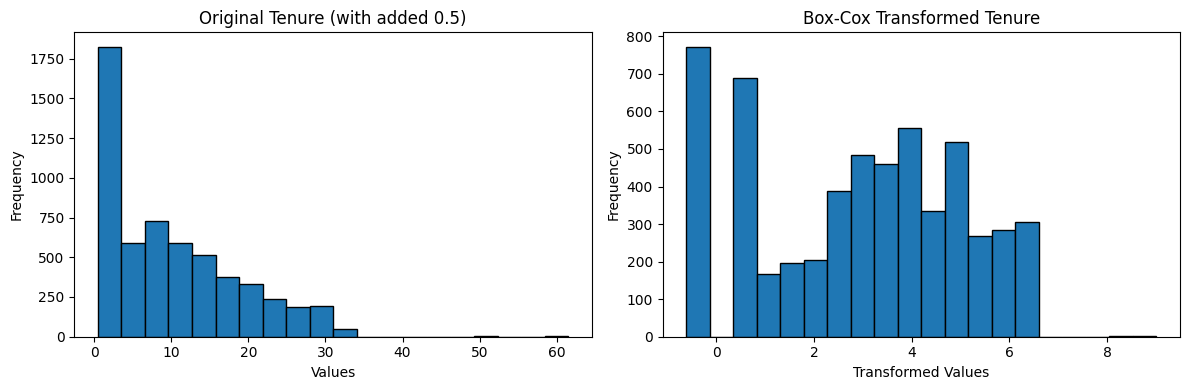

Lambda value used for transformation: 0.34097539234987917


In [49]:
# Step 1: Add a small value (e.g., 0.5) to all values to handle zeros or negative values
from scipy import stats

test = df['Tenure'] + 0.5

# Step 2: Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(test)

# Create a new DataFrame to store transformed values
df_transformed = df_encoded.copy()
df_transformed['Tenure_transformed'] = transformed_data

# Step 3: Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original Tenure (with added 0.5)')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(transformed_data, bins=20, edgecolor='black')
ax[1].set_title('Box-Cox Transformed Tenure')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Lambda value used for transformation: {lambda_value}")

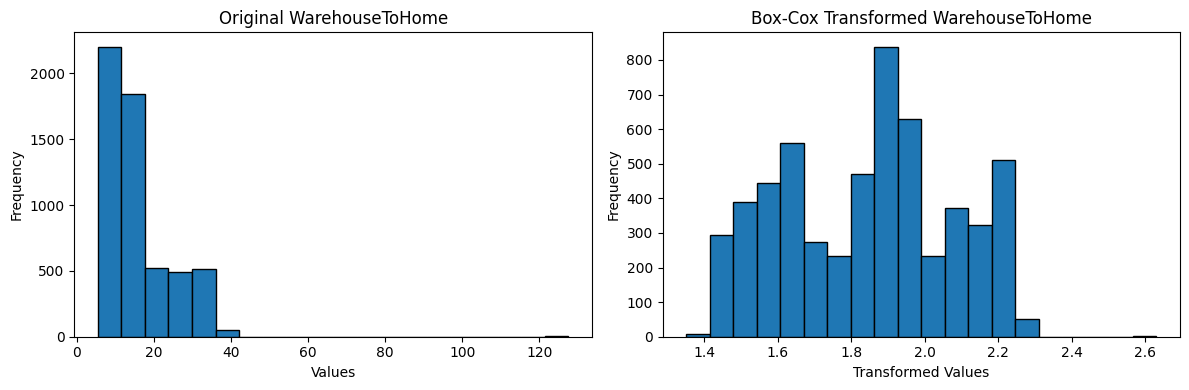

Lambda value used for transformation: -0.2843229410352237


In [50]:
from scipy import stats
# Option 1: Add a small value (e.g., 0.5) to all values to handle zeros
test = df['WarehouseToHome'] + 0.5

# Option 2: Log transformation for zeros (if applicable)
# test = np.log1p(df['WarehouseToHome'])

# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(test)

# Create a new DataFrame to store transformed values

df_transformed['WarehouseToHome_transformed'] = transformed_data

# Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original WarehouseToHome')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(transformed_data, bins=20, edgecolor='black')
ax[1].set_title('Box-Cox Transformed WarehouseToHome')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Lambda value used for transformation: {lambda_value}")


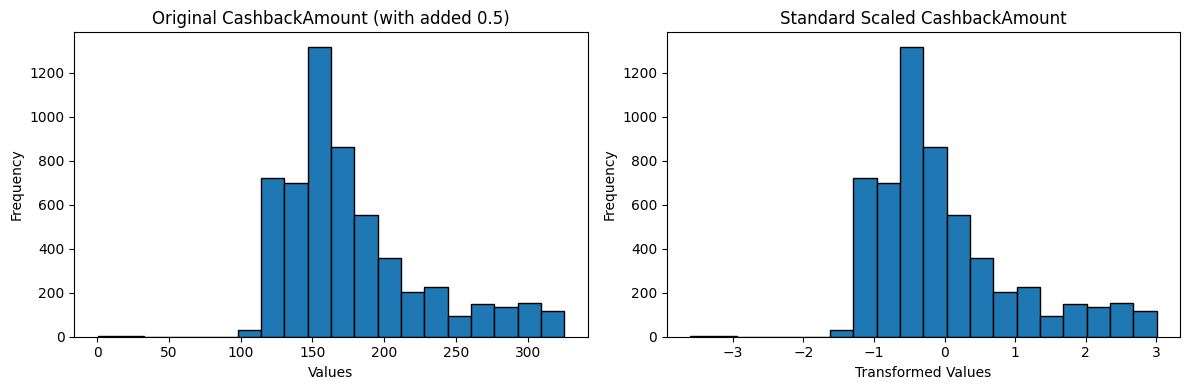

In [51]:
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is your DataFrame and 'CashbackAmount' is the column of interest

# Step 1
test = df_encoded['CashbackAmount'] + 0.5

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Reshape the data for StandardScaler and apply the transformation
test_transformed = scaler.fit_transform(test.values.reshape(-1, 1))

# Create a new DataFrame to store transformed values

df_transformed['CashbackAmount_transformed'] = test_transformed

# Step 4: Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original CashbackAmount (with added 0.5)')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(test_transformed, bins=20, edgecolor='black')
ax[1].set_title('Standard Scaled CashbackAmount')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [52]:
drop_columns = ['Tenure', 'WarehouseToHome', 'CashbackAmount']
df_transformed = df_transformed.drop(drop_columns, axis=1)

In [53]:
df_transformed.columns

Index(['cat__PreferredLoginDevice_Computer',
       'cat__PreferredLoginDevice_Mobile Phone',
       'cat__PreferredLoginDevice_Phone', 'cat__PreferredPaymentMode_CC',
       'cat__PreferredPaymentMode_COD',
       'cat__PreferredPaymentMode_Cash on Delivery',
       'cat__PreferredPaymentMode_Credit Card',
       'cat__PreferredPaymentMode_Debit Card',
       'cat__PreferredPaymentMode_E wallet', 'cat__PreferredPaymentMode_UPI',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__PreferedOrderCat_Fashion', 'cat__PreferedOrderCat_Grocery',
       'cat__PreferedOrderCat_Laptop & Accessory',
       'cat__PreferedOrderCat_Mobile', 'cat__PreferedOrderCat_Mobile Phone',
       'cat__PreferedOrderCat_Others', 'cat__MaritalStatus_Divorced',
       'cat__MaritalStatus_Married', 'cat__MaritalStatus_Single', 'Churn',
       'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUs

In [54]:
df_transformed.head()

,cat__PreferredLoginDevice_Computer,cat__PreferredLoginDevice_Mobile Phone,cat__PreferredLoginDevice_Phone,cat__PreferredPaymentMode_CC,cat__PreferredPaymentMode_COD,cat__PreferredPaymentMode_Cash on Delivery,cat__PreferredPaymentMode_Credit Card,cat__PreferredPaymentMode_Debit Card,cat__PreferredPaymentMode_E wallet,cat__PreferredPaymentMode_UPI,...,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,Tenure_transformed,WarehouseToHome_transformed,CashbackAmount_transformed
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,9.0,1.0,11.0,1.0,1.0,5.0,1.965097,1.451471,-0.351465
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,7.0,1.0,15.0,0.0,1.0,0.0,-0.617325,1.603167,-1.144715
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,6.0,1.0,14.0,0.0,1.0,3.0,-0.617325,2.186159,-1.157316
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,8.0,0.0,23.0,0.0,1.0,3.0,-0.617325,1.903700,-0.877047
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,0.0,11.0,1.0,1.0,3.0,-0.617325,1.801941,-0.967895


# **Apply Model**

In [55]:
# Split data
X = df_transformed.drop('Churn', axis=1)
y = df_transformed['Churn']

In [56]:
# Train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest**

Accuracy: 97.34%
Precision: 99.36%
Recall: 84.32%
roc_auc_score: 98.94%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       941
         1.0       0.99      0.84      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.95      1126
weighted avg       0.97      0.97      0.97      1126



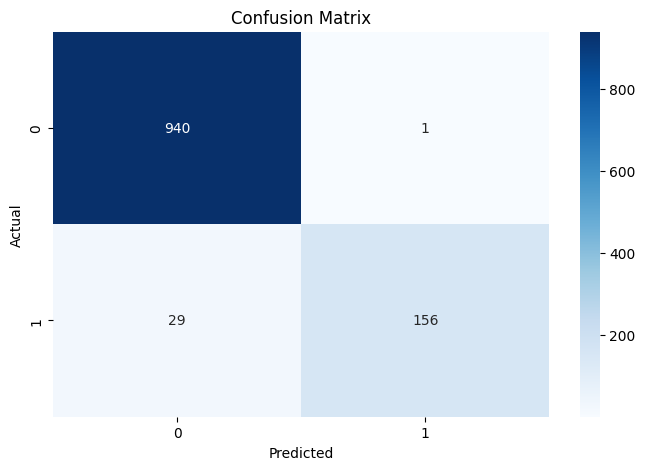

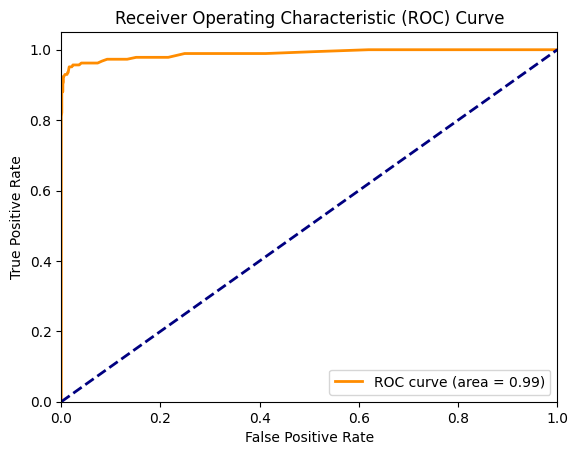

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score,classification_report, confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score

# Khởi tạo mô hình RandomForest
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
RF.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = RF.predict(X_test) # Số nguyên: {0,1}
y_pred_prob = RF.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision và recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'roc_auc_score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
# Áp dụng k-fold cross-validation (vd: k=5) trên tập huấn luyện
cv_scores = cross_val_score(RF, X_train, y_train, cv=5)

# Chuyển đổi các điểm số từ dạng tỉ lệ sang phần trăm
cv_scores_percent = np.round(cv_scores * 100, 2)

# In kết quả đánh giá từng fold dưới dạng phần trăm
print("Cross-validation scores (%):", [f"{score:.2f}%" for score in cv_scores_percent])

# In trung bình và độ lệch chuẩn của các điểm số cross-validation dưới dạng phần trăm
print(f"Mean CV score (%): {np.mean(cv_scores_percent):.2f}% +/- {np.std(cv_scores_percent):.2f}%")

Cross-validation scores (%): ['94.23%', '94.34%', '96.12%', '94.01%', '96.89%']
Mean CV score (%): 95.12% +/- 1.16%


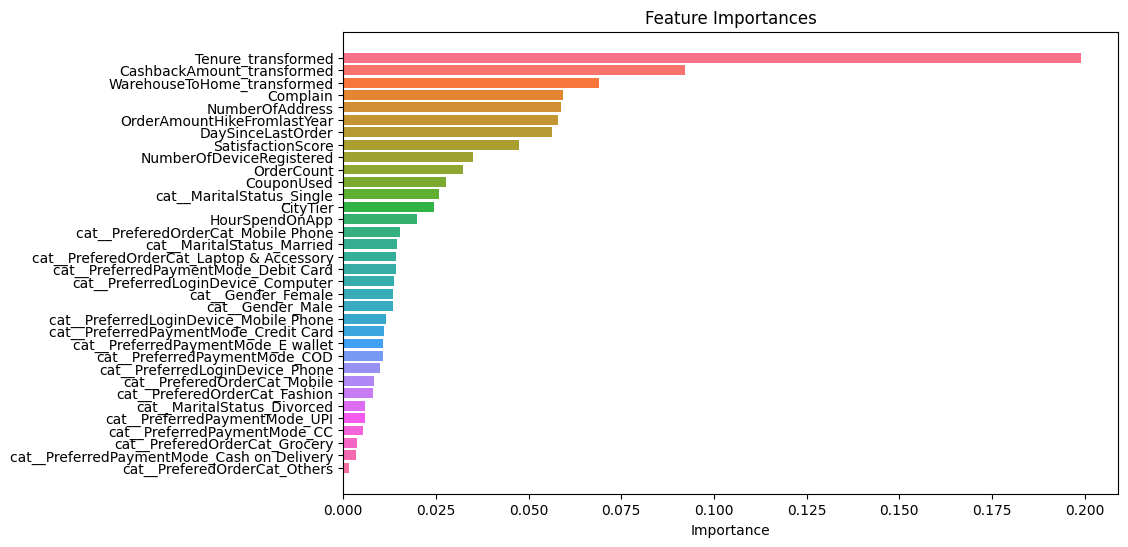

In [59]:
# Get feature importances
importances = RF.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Define colors for the bars
palette = sns.color_palette("husl", n_colors=X_train.shape[1])  # Change "husl" to any other palette

# Plot horizontal bar chart with colored bars
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances[indices], color=palette)
plt.yticks(range(X_train.shape[1]), names)
plt.title("Feature Importances")
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()

Hiện tại do mức accuracy đã ở mức khá cao, tạm thời chưa cần hyperparameter tunning cho model, các mức default đang cho kết quả **khá tốt**

## **Logistic Regression**

Accuracy: 91.12%
Precision: 81.02%
Recall: 60.00%
ROC AUC Score: 90.62%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       941
         1.0       0.81      0.60      0.69       185

    accuracy                           0.91      1126
   macro avg       0.87      0.79      0.82      1126
weighted avg       0.91      0.91      0.91      1126



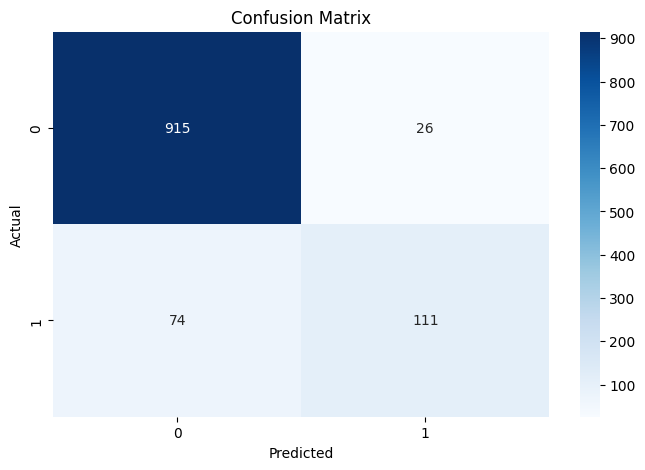

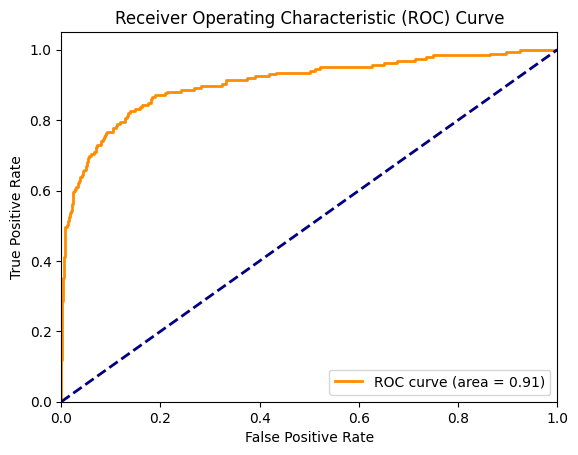

In [60]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện mô hình
logreg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = logreg.predict(X_test)  # Số nguyên: {0,1}
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision, recall, accuracy, và roc_auc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression(random_state=42,max_iter = 1000)

# Định nghĩa grid của các tham số cần tìm kiếm
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

# Sử dụng GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found:", grid_search.best_params_)

# Dự đoán trên tập kiểm tra sử dụng mô hình tốt nhất
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Tính toán và in ra các chỉ số đánh giá
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best parameters found: {'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 91.12%
Precision: 81.02%
Recall: 60.00%
ROC AUC Score: 90.62%


In [62]:
# Khởi tạo mô hình Logistic Regression với các tham số tốt nhất
best_params = {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_tunning = LogisticRegression(**best_params, random_state=42, max_iter=1000)

# Thực hiện k-fold cross-validation
k = 5
cv_scores = cross_val_score(logreg_tunning, X_train, y_train, cv=k, scoring='accuracy')

# In kết quả
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores: [0.88679245 0.87791343 0.88901221 0.90344062 0.88222222]
Mean cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.01


<ipython-input-63-aedacc2de68f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(10), palette='husl')


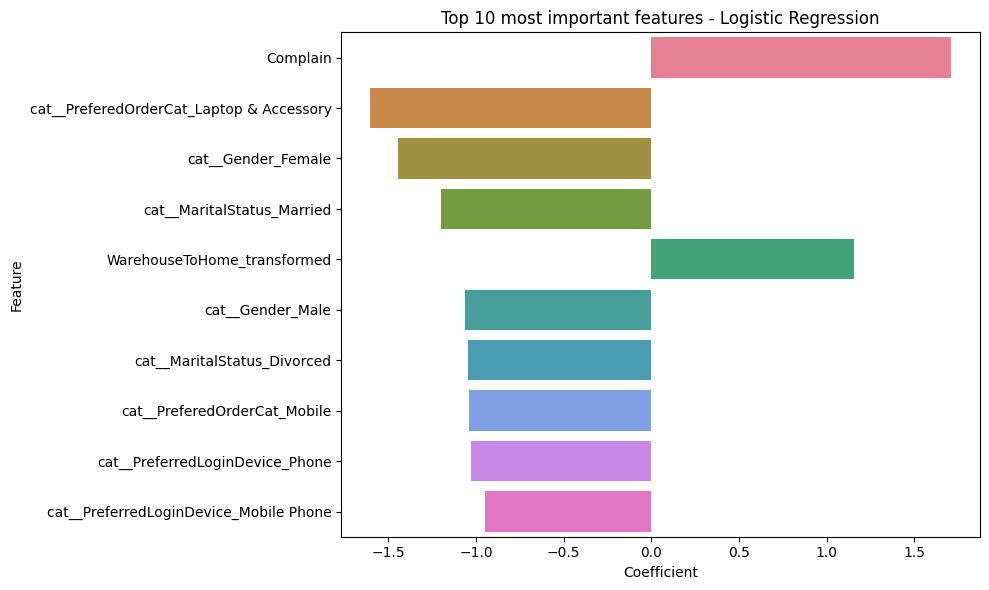

In [63]:
# Khởi tạo mô hình Logistic Regression với các tham số tốt nhất
best_params = {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_tunning = LogisticRegression(**best_params, random_state=42, max_iter=1000)

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
logreg_tunning.fit(X_train, y_train)

# Lấy các hệ số của mô hình Logistic Regression
coefficients = logreg_tunning.coef_[0]

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Tạo DataFrame để hiển thị feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)  # Độ lớn tuyệt đối của hệ số
})

# Sắp xếp theo độ lớn tuyệt đối của hệ số
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Vẽ đồ thị cột cho các feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(10), palette='husl')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 most important features - Logistic Regression')
plt.tight_layout()
plt.show()

Mô hình không perform tốt bằng RandomForest, dù sau khi GridSearch. Có lẽ cần chuẩn hóa thêm dữ liệu để cho kết quả tốt hơn. Độ quan trọng của kết quả mô hình LogReg cũng khác đáng kể so với RandomForest. Chúng ta sẽ xử lý vấn đề này sau

## **CatBoost**

In [64]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8583481	test: 0.8552398	best: 0.8552398 (0)	total: 56.3ms	remaining: 56.3s
100:	learn: 0.9653641	test: 0.9440497	best: 0.9449378 (95)	total: 645ms	remaining: 5.74s
200:	learn: 0.9937833	test: 0.9680284	best: 0.9680284 (180)	total: 1.44s	remaining: 5.73s
300:	learn: 0.9988899	test: 0.9777975	best: 0.9795737 (293)	total: 2.03s	remaining: 4.71s
400:	learn: 1.0000000	test: 0.9831261	best: 0.9831261 (394)	total: 2.62s	remaining: 3.91s
500:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (428)	total: 4.2s	remaining: 4.18s
600:	learn: 1.0000000	test: 0.9849023	best: 0.9857904 (513)	total: 5.58s	remaining: 3.71s
700:	learn: 1.0000000	test: 0.9857904	best: 0.9857904 (513)	total: 6.62s	remaining: 2.83s
800:	learn: 1.0000000	test: 0.9857904	best: 0.9857904 (513)	total: 7.39s	remaining: 1.84s
900:	learn: 1.0000000	test: 0.9857904	best: 0.9857904 (513)	total: 8.15s	remaining: 896ms
999:	learn: 1.0000000	test: 0.9849023	best: 0.9857904 (513)	total: 9.01s	remaining: 0us

bestTest = 0.985

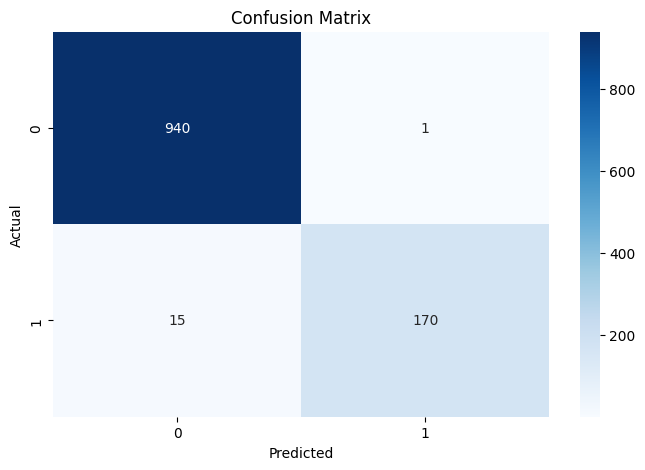

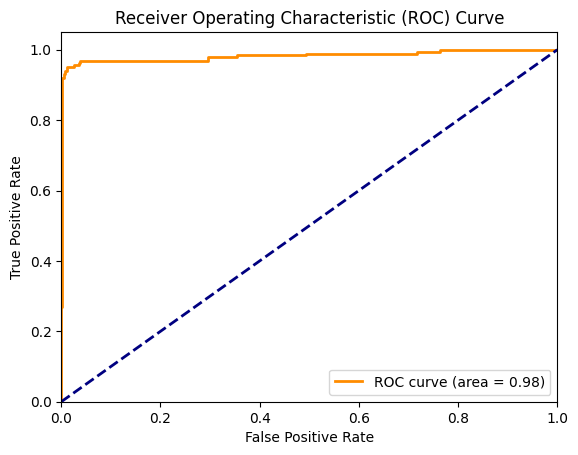

In [65]:
from catboost import CatBoostClassifier
# Khởi tạo mô hình CatBoost
catboost = CatBoostClassifier(iterations=1000,  # số lượng cây quyết định (trees) sẽ xây dựng
                              learning_rate=0.1,  # tỷ lệ học tập
                              depth=6,  # độ sâu của mỗi cây
                              loss_function='Logloss',  # hàm mất mát
                              eval_metric='Accuracy',  # độ đo đánh giá mô hình
                              random_seed=42,  # seed để tái sản sinh kết quả
                              verbose=100)  # in thông tin sau mỗi lần lặp

# Huấn luyện mô hình
catboost.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

# Dự đoán trên tập kiểm tra
y_pred = catboost.predict(X_test)  # Số nguyên: {0,1}
y_pred_prob = catboost.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision, recall, accuracy, và roc_auc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
from sklearn.model_selection import StratifiedKFold
# Khởi tạo Stratified KFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Khởi tạo các list để lưu kết quả cross-validation
acc_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Chia dữ liệu và huấn luyện mô hình sử dụng Stratified KFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    catboost.fit(X_train, y_train, eval_set=(X_test, y_test), plot=False)

    # Dự đoán trên tập kiểm tra
    y_pred = catboost.predict(X_test)
    y_pred_prob = catboost.predict_proba(X_test)[:, 1]

    # Tính các chỉ số đánh giá
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Lưu các kết quả vào list
    acc_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)

# In kết quả trung bình của cross-validation
print(f'Average Accuracy: {np.mean(acc_scores) * 100:.2f}%')
print(f'Average Precision: {np.mean(precision_scores) * 100:.2f}%')
print(f'Average Recall: {np.mean(recall_scores) * 100:.2f}%')
print(f'Average ROC AUC Score: {np.mean(roc_auc_scores) * 100:.2f}%')

0:	learn: 0.8585702	test: 0.8507993	best: 0.8507993 (0)	total: 7.22ms	remaining: 7.21s
100:	learn: 0.9673623	test: 0.9431616	best: 0.9440497 (95)	total: 710ms	remaining: 6.32s
200:	learn: 0.9951155	test: 0.9662522	best: 0.9662522 (200)	total: 1.04s	remaining: 4.15s
300:	learn: 0.9991119	test: 0.9742451	best: 0.9751332 (296)	total: 1.58s	remaining: 3.68s
400:	learn: 1.0000000	test: 0.9777975	best: 0.9777975 (367)	total: 2.22s	remaining: 3.32s
500:	learn: 1.0000000	test: 0.9795737	best: 0.9795737 (465)	total: 3.04s	remaining: 3.03s
600:	learn: 1.0000000	test: 0.9813499	best: 0.9822380 (572)	total: 3.61s	remaining: 2.4s
700:	learn: 1.0000000	test: 0.9804618	best: 0.9822380 (572)	total: 4.38s	remaining: 1.87s
800:	learn: 1.0000000	test: 0.9804618	best: 0.9822380 (572)	total: 5.3s	remaining: 1.32s
900:	learn: 1.0000000	test: 0.9813499	best: 0.9822380 (572)	total: 5.94s	remaining: 653ms
999:	learn: 1.0000000	test: 0.9813499	best: 0.9822380 (572)	total: 7.22s	remaining: 0us

bestTest = 0.9822

0:	learn: 0.8577265	total: 12.7ms	remaining: 12.7s
100:	learn: 0.9642984	total: 613ms	remaining: 5.45s
200:	learn: 0.9944938	total: 1.17s	remaining: 4.64s
300:	learn: 0.9998224	total: 1.5s	remaining: 3.49s
400:	learn: 1.0000000	total: 1.86s	remaining: 2.78s
500:	learn: 1.0000000	total: 2.2s	remaining: 2.19s
600:	learn: 1.0000000	total: 2.75s	remaining: 1.83s
700:	learn: 1.0000000	total: 3.44s	remaining: 1.47s
800:	learn: 1.0000000	total: 4.2s	remaining: 1.04s
900:	learn: 1.0000000	total: 4.84s	remaining: 532ms
999:	learn: 1.0000000	total: 5.2s	remaining: 0us


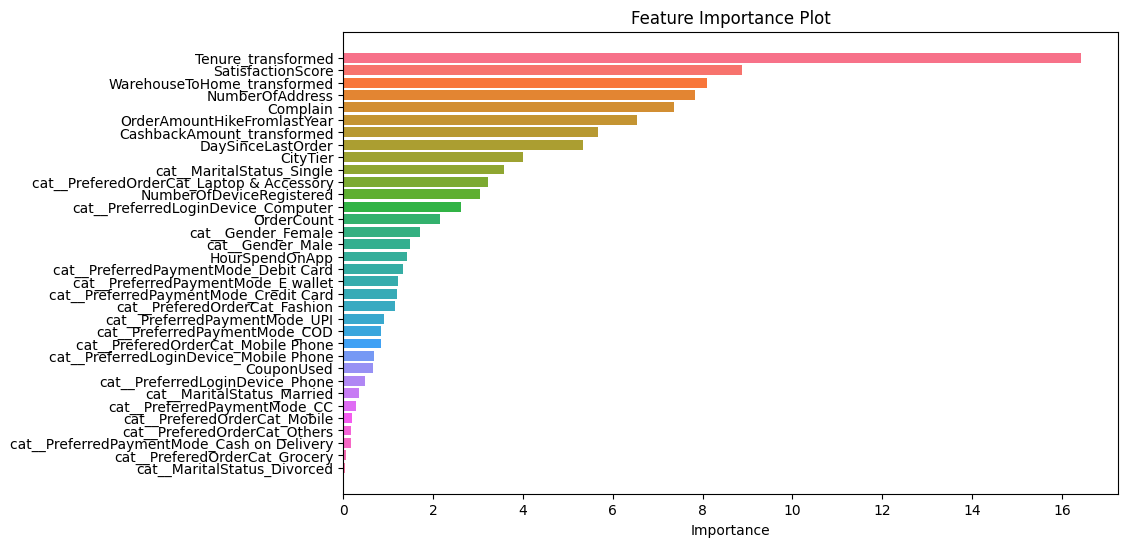

In [67]:
from catboost import CatBoostClassifier, Pool, cv
import matplotlib.pyplot as plt

# Initialize CatBoost model
catboost = CatBoostClassifier(iterations=1000,
                              learning_rate=0.1,
                              depth=6,
                              loss_function='Logloss',
                              eval_metric='Accuracy',
                              random_seed=42,
                              verbose=100)

# Train the model on the entire dataset
catboost.fit(X, y, plot=False)

# Get feature importance
feature_importance = catboost.get_feature_importance()

# Get names of independent variables (features)
features = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Use a palette for plotting (e.g., Husl palette)
palette = sns.color_palette("husl", n_colors=len(sorted_features))

# Plot horizontal bar chart with colored bars
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_features)), sorted_importance, color=palette)
plt.yticks(range(len(sorted_features)), sorted_features)
plt.title("Feature Importance Plot")
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Show plot
plt.show()


Mô hình CatBoost cho thấy khả năng dự báo tốt vượt trội so với RandomForest, dù là trên tập Kfold. Các yếu tố quan trọng cũng cho ra kết quả gần tương tự RandomForest.